(0, 1.0)

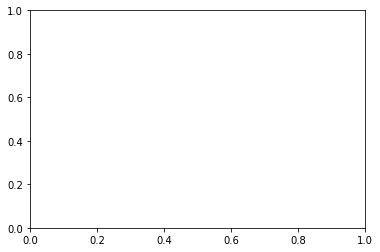

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.ylim(bottom=0)

In [2]:
df=pd.read_csv('src_05/stats_set.csv')
df['client']=df['client']*6

scl=1./2**20 # in MBs

df['server_recv']=df['server_recv']*scl
df['server_send']=df['server_send']*scl
df['mw_recv']=df['mw_recv']*scl
df['mw_send']=df['mw_send']*scl

df['client_send']=abs(df['mw_recv']-df['server_send'])
df['client_recv']=abs(df['mw_send']-df['server_recv'])

df8 = df[df['mw_thread'] == 8]
df16 = df[df['mw_thread'] == 16]
df32 = df[df['mw_thread'] == 32]
df64 = df[df['mw_thread'] == 64]

(0, 40)

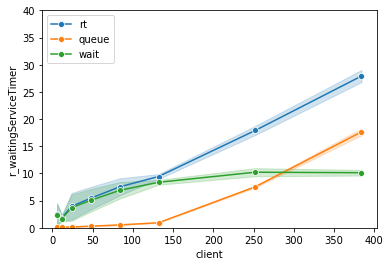

In [30]:
# time decomposition
t_df = df64.copy()
t_df['r_agg']=t_df['r_internalQueueTimer']+t_df['r_waitingServiceTimer']
ax = sns.lineplot(x='client', y='mw_rt', ci="sd", data=t_df, legend=None, marker="o",label='rt')
ax = sns.lineplot(x='client', y='r_internalQueueTimer', ci="sd", data=t_df, legend=None, marker="o",label='queue')
ax = sns.lineplot(x='client', y='r_waitingServiceTimer', ci="sd", data=t_df, legend="full", marker="o",label='wait')

plt.legend(loc=2)
ax.set_ylim(bottom=0,top=40)


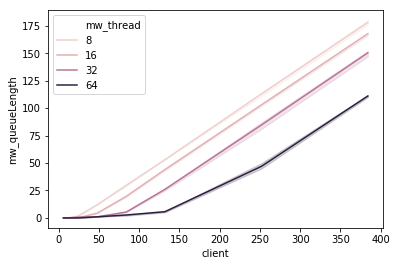

In [31]:
# queue length  
ax=sns.lineplot(x='client', y='mw_queueLength', hue='mw_thread', data=df, legend="full")


In [32]:
# server cpu; if low -> threads are mostly waiting

In [30]:
df8.groupby('client').aggregate('mean')[['mw_th', 'c_th','mw_rt','c_rt','r_internalQueueTimer', 'mw_queueLength', 'r_waitingServiceTimer']].round(2)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mw_th</th>
      <th>c_th</th>
      <th>mw_rt</th>
      <th>c_rt</th>
      <th>r_internalQueueTimer</th>
      <th>mw_queueLength</th>
      <th>r_waitingServiceTimer</th>
    </tr>
    <tr>
      <th>client</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>6</th>
      <td>2327.26</td>
      <td>2327.20</td>
      <td>1.68</td>
      <td>2.59</td>
      <td>0.07</td>
      <td>0.00</td>
      <td>1.54</td>
    </tr>
    <tr>
      <th>12</th>
      <td>4569.68</td>
      <td>4569.58</td>
      <td>1.62</td>
      <td>2.64</td>
      <td>0.10</td>
      <td>0.00</td>
      <td>1.45</td>
    </tr>
    <tr>
      <th>24</th>
      <td>6442.50</td>
      <td>6442.23</td>
      <td>2.67</td>
      <td>3.74</td>
      <td>0.54</td>
      <td>1.67</td>
      <td>2.06</td>
    </tr>
    <tr>
      <th>48</th>
      <td>7103.65</td>
      <td>7103.28</td>
      <td>5.62</td>
      <td>6.79</td>
      <td>3.38</td>
      <td>12.00</td>
      <td>2.17</td>
    </tr>
    <tr>
      <th>84</th>
      <td>7185.64</td>
      <td>7254.60</td>
      <td>10.53</td>
      <td>11.75</td>
      <td>8.30</td>
      <td>29.67</td>
      <td>2.15</td>
    </tr>
    <tr>
      <th>132</th>
      <td>7192.24</td>
      <td>7179.48</td>
      <td>17.27</td>
      <td>18.43</td>
      <td>15.02</td>
      <td>53.00</td>
      <td>2.17</td>
    </tr>
    <tr>
      <th>252</th>
      <td>7258.66</td>
      <td>7254.93</td>
      <td>33.59</td>
      <td>34.86</td>
      <td>31.39</td>
      <td>113.00</td>
      <td>2.13</td>
    </tr>
    <tr>
      <th>384</th>
      <td>7316.03</td>
      <td>7313.55</td>
      <td>51.40</td>
      <td>52.72</td>
      <td>49.20</td>
      <td>178.00</td>
      <td>2.12</td>
    </tr>
  </tbody>
</table>
</div>

In [7]:
df16.groupby('client').aggregate('mean')[['mw_th','mw_rt','c_rt','r_internalQueueTimer', 'r_waitingServiceTimer']].round(2)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mw_th</th>
      <th>mw_rt</th>
      <th>c_rt</th>
      <th>r_internalQueueTimer</th>
      <th>r_waitingServiceTimer</th>
    </tr>
    <tr>
      <th>client</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>6</th>
      <td>2421.79</td>
      <td>1.52</td>
      <td>2.49</td>
      <td>0.07</td>
      <td>1.38</td>
    </tr>
    <tr>
      <th>12</th>
      <td>4468.18</td>
      <td>2.12</td>
      <td>2.70</td>
      <td>0.10</td>
      <td>1.95</td>
    </tr>
    <tr>
      <th>24</th>
      <td>6730.10</td>
      <td>2.53</td>
      <td>3.58</td>
      <td>0.15</td>
      <td>2.29</td>
    </tr>
    <tr>
      <th>48</th>
      <td>8570.34</td>
      <td>4.39</td>
      <td>5.65</td>
      <td>0.98</td>
      <td>3.32</td>
    </tr>
    <tr>
      <th>84</th>
      <td>9136.30</td>
      <td>7.88</td>
      <td>9.24</td>
      <td>4.38</td>
      <td>3.41</td>
    </tr>
    <tr>
      <th>132</th>
      <td>9200.52</td>
      <td>13.29</td>
      <td>14.47</td>
      <td>9.73</td>
      <td>3.47</td>
    </tr>
    <tr>
      <th>252</th>
      <td>9279.37</td>
      <td>25.98</td>
      <td>27.35</td>
      <td>22.52</td>
      <td>3.37</td>
    </tr>
    <tr>
      <th>384</th>
      <td>9292.62</td>
      <td>40.33</td>
      <td>41.65</td>
      <td>36.83</td>
      <td>3.41</td>
    </tr>
  </tbody>
</table>
</div>

In [35]:
df32.groupby('client').aggregate('mean')[['mw_th','mw_rt','c_rt','r_internalQueueTimer', 'r_waitingServiceTimer']].round(2)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mw_th</th>
      <th>mw_rt</th>
      <th>c_rt</th>
      <th>r_internalQueueTimer</th>
      <th>r_waitingServiceTimer</th>
    </tr>
    <tr>
      <th>client</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>6</th>
      <td>2443.64</td>
      <td>1.97</td>
      <td>2.48</td>
      <td>0.07</td>
      <td>1.83</td>
    </tr>
    <tr>
      <th>12</th>
      <td>4701.04</td>
      <td>1.77</td>
      <td>2.58</td>
      <td>0.09</td>
      <td>1.60</td>
    </tr>
    <tr>
      <th>24</th>
      <td>6677.75</td>
      <td>3.07</td>
      <td>3.62</td>
      <td>0.15</td>
      <td>2.84</td>
    </tr>
    <tr>
      <th>48</th>
      <td>8719.72</td>
      <td>4.44</td>
      <td>5.57</td>
      <td>0.30</td>
      <td>4.05</td>
    </tr>
    <tr>
      <th>84</th>
      <td>10194.71</td>
      <td>7.13</td>
      <td>8.35</td>
      <td>1.23</td>
      <td>5.79</td>
    </tr>
    <tr>
      <th>132</th>
      <td>10805.83</td>
      <td>10.71</td>
      <td>12.30</td>
      <td>4.80</td>
      <td>5.80</td>
    </tr>
    <tr>
      <th>252</th>
      <td>10757.52</td>
      <td>23.40</td>
      <td>23.91</td>
      <td>16.82</td>
      <td>6.47</td>
    </tr>
    <tr>
      <th>384</th>
      <td>10882.98</td>
      <td>34.50</td>
      <td>35.71</td>
      <td>28.38</td>
      <td>6.01</td>
    </tr>
  </tbody>
</table>
</div>

In [36]:
df64.groupby('client').aggregate('mean')[['mw_th','mw_rt','c_rt','r_internalQueueTimer', 'r_waitingServiceTimer']].round(2)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mw_th</th>
      <th>mw_rt</th>
      <th>c_rt</th>
      <th>r_internalQueueTimer</th>
      <th>r_waitingServiceTimer</th>
    </tr>
    <tr>
      <th>client</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>6</th>
      <td>2479.85</td>
      <td>2.56</td>
      <td>2.44</td>
      <td>0.07</td>
      <td>2.41</td>
    </tr>
    <tr>
      <th>12</th>
      <td>4820.90</td>
      <td>1.86</td>
      <td>2.51</td>
      <td>0.09</td>
      <td>1.69</td>
    </tr>
    <tr>
      <th>24</th>
      <td>6626.21</td>
      <td>3.95</td>
      <td>3.74</td>
      <td>0.15</td>
      <td>3.70</td>
    </tr>
    <tr>
      <th>48</th>
      <td>8625.73</td>
      <td>5.45</td>
      <td>5.67</td>
      <td>0.30</td>
      <td>5.06</td>
    </tr>
    <tr>
      <th>84</th>
      <td>10174.65</td>
      <td>7.55</td>
      <td>8.40</td>
      <td>0.53</td>
      <td>6.90</td>
    </tr>
    <tr>
      <th>132</th>
      <td>11708.52</td>
      <td>9.43</td>
      <td>11.29</td>
      <td>0.93</td>
      <td>8.37</td>
    </tr>
    <tr>
      <th>252</th>
      <td>12584.82</td>
      <td>17.90</td>
      <td>20.13</td>
      <td>7.53</td>
      <td>10.23</td>
    </tr>
    <tr>
      <th>384</th>
      <td>12735.16</td>
      <td>27.91</td>
      <td>30.24</td>
      <td>17.64</td>
      <td>10.13</td>
    </tr>
  </tbody>
</table>
</div>

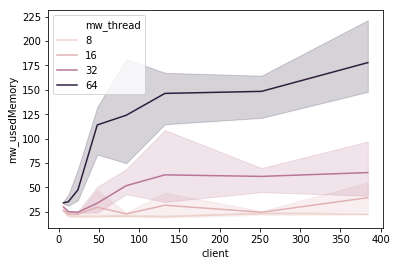

In [40]:
tmp_df=df.copy()
tmp_df['mw_usedMemory']=tmp_df['mw_usedMemory']*scl
ax=sns.lineplot(x='client', y='mw_usedMemory', hue='mw_thread', data=tmp_df, legend="full")